## Intro to matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

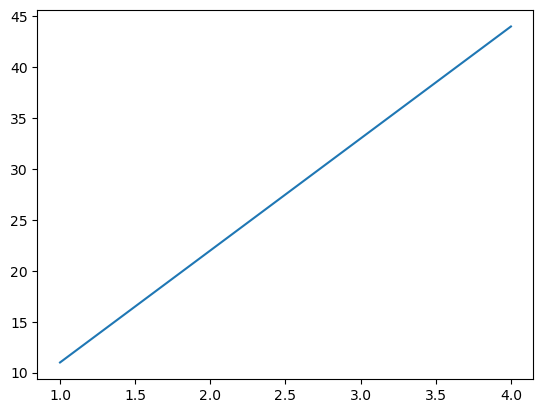

In [2]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y)
plt.show()

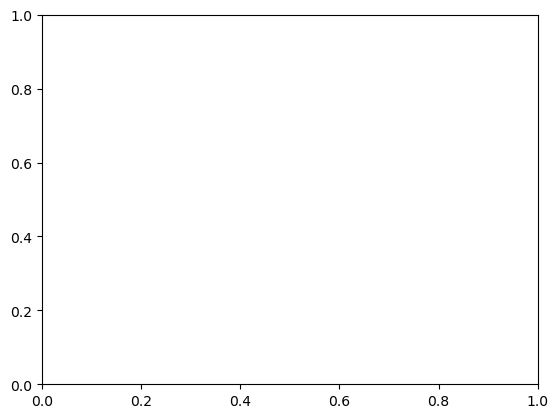

In [3]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

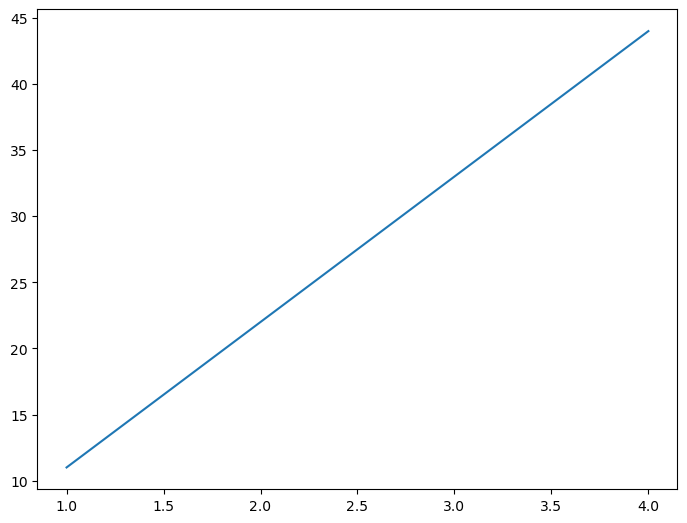

In [4]:
# 2nd method
fig = plt.figure() #creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

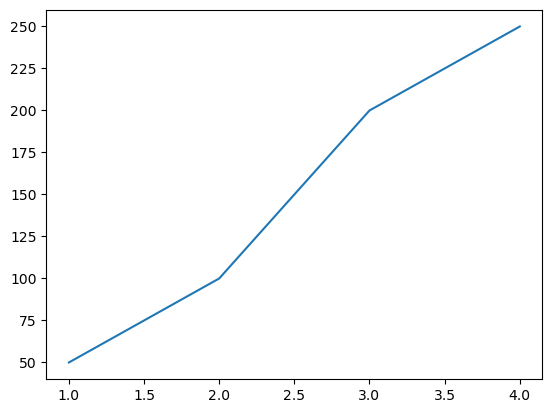

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

In [5]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x,[50,100,200,250]) # add some data
plt.show()
type(fig), type(ax)

## Matplotlib example workflow

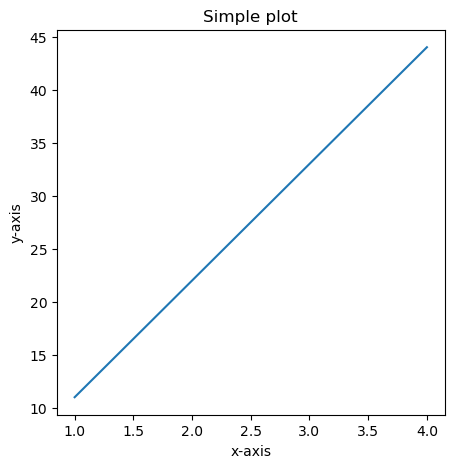

In [6]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1,2,3,4]
y = [11,22,33,44]

#2. Setup plot
fig, ax = plt.subplots(figsize=(5,5))

#3. plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title="Simple plot", xlabel="x-axis", ylabel="y-axis")

#5. Save & show 
plt.show()
fig.savefig("images/same-plot.png");


## making figures with NumPy arrays

In [7]:
# Create some data
x = np.linspace(0,10,100)
x[:10]


array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

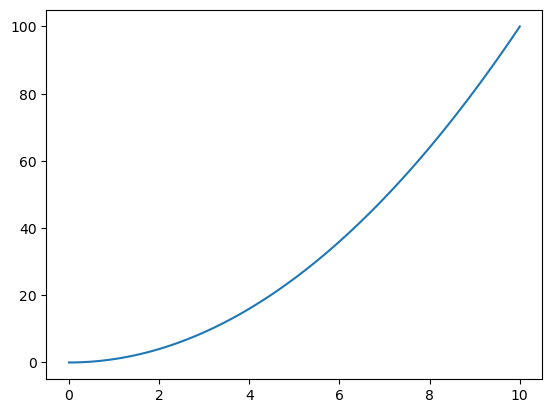

In [8]:
#plt the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2);
plt.show()

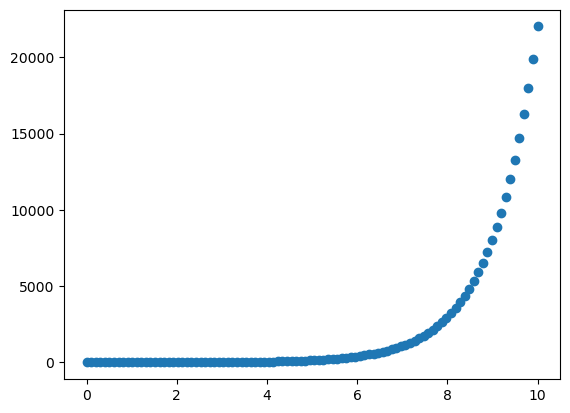

In [9]:
# Use same data to make scatter
fig,ax=plt.subplots()
ax.scatter(x, np.exp(x));
plt.show()

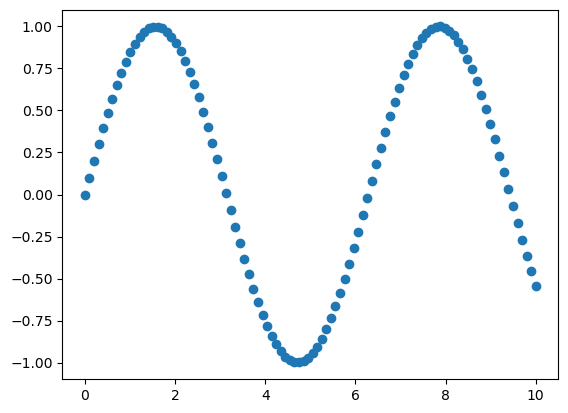

In [10]:
# another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));
plt.show()

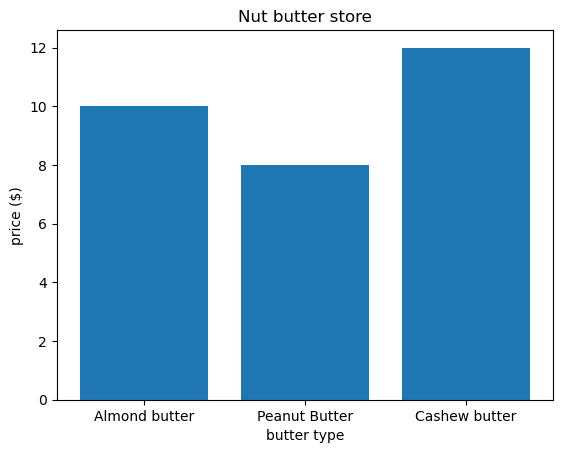

In [11]:
# make a plot from dictionary
nut_b_prices = {"Almond butter":10, 
                "Peanut Butter":8, 
                "Cashew butter": 12}
fig,ax = plt.subplots()
ax.bar(nut_b_prices.keys(),nut_b_prices.values())
ax.set(title="Nut butter store",xlabel="butter type", ylabel="price ($)")
plt.show()

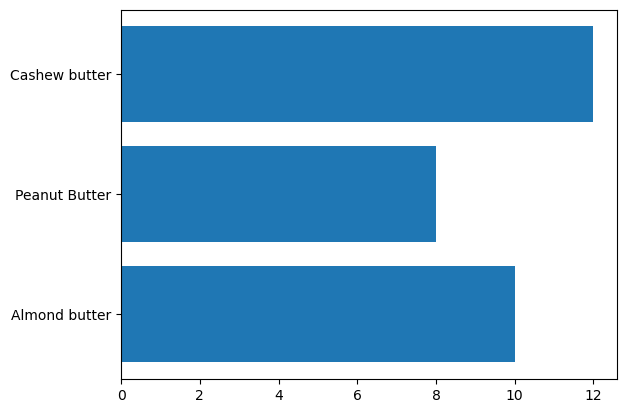

In [12]:
fig,ax=plt.subplots()
ax.barh(nut_b_prices.keys(),nut_b_prices.values());
plt.show()

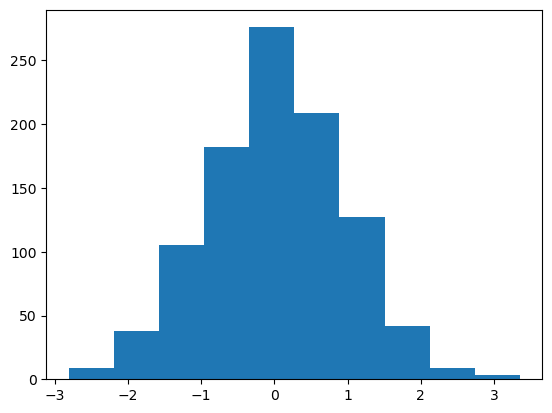

In [13]:
# make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots();
ax.hist(x);
plt.show()

## two options for subplots

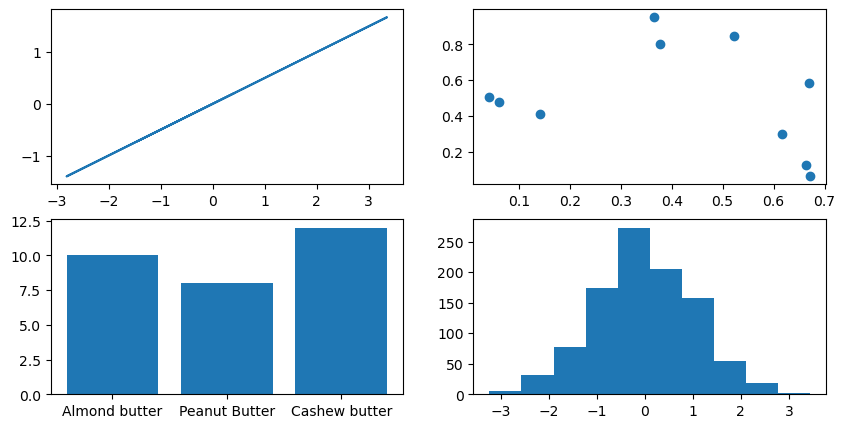

In [14]:
# subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10,5));
#plot to each diff axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_b_prices.keys(), nut_b_prices.values());
ax4.hist(np.random.randn(1000));
plt.show()

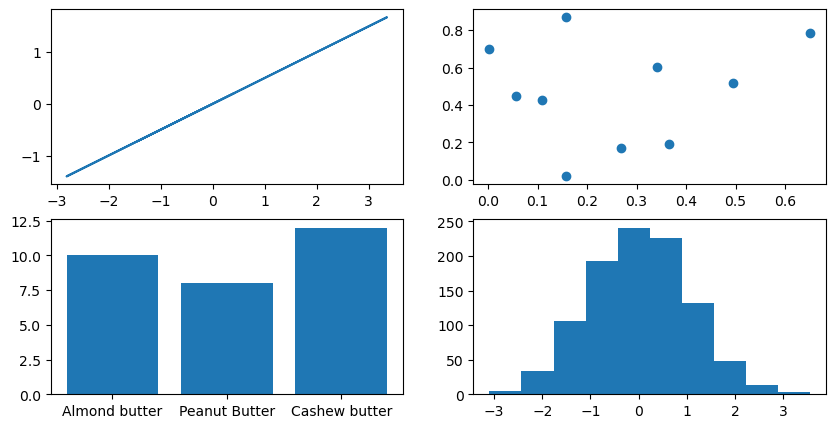

In [15]:
# subplots option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,5))
#plot to each different index
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_b_prices.keys(), nut_b_prices.values());
ax[1,1].hist(np.random.randn(1000));

plt.show()

## Plotting from pandas DataFrames

In [16]:
import pandas as pd

In [17]:
# Make a DataFrame
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


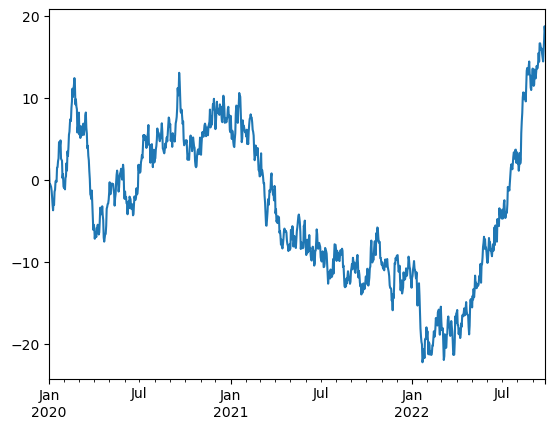

In [18]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range("1/1/2020", periods=1000))
ts = ts.cumsum()
ts.plot()
plt.show()

In [19]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [20]:
car_sales["Price"] = car_sales["Price"].replace('[$,.]','',regex=True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [21]:
type(car_sales["Price"][0])

str

In [22]:
# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [23]:
car_sales["Sale Date"] = pd.date_range("1/1/2020",periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [24]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


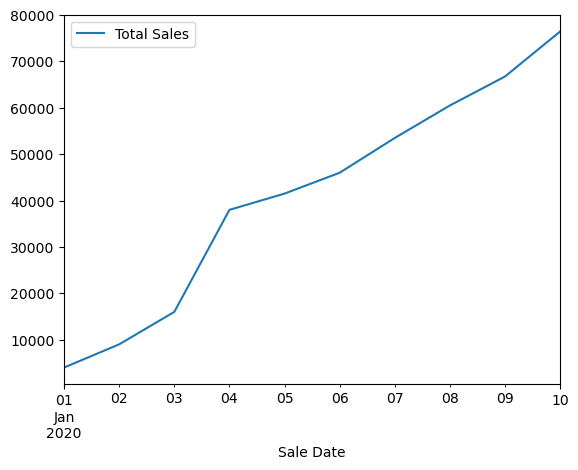

In [25]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");
plt.show();

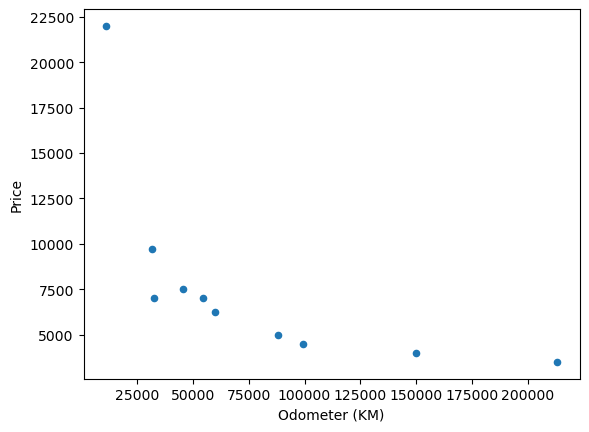

In [26]:
# reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price",kind="scatter");
plt.show();

In [27]:
# bar graph
x = np.random.rand(10,4)
x

# turn it into DataFrame
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.415092,0.765570,0.556458,0.597156
1,0.477934,0.842784,0.958576,0.134403
2,0.692798,0.982792,0.027232,0.896910
3,0.186916,0.900613,0.646171,0.646979
4,0.761356,0.103635,0.744395,0.697559
5,0.675151,0.566695,0.164410,0.605377
6,0.831463,0.444731,0.124087,0.390173
7,0.888449,0.217916,0.771657,0.053137
8,0.341598,0.633588,0.401543,0.792910
9,0.672226,0.720376,0.705140,0.772973


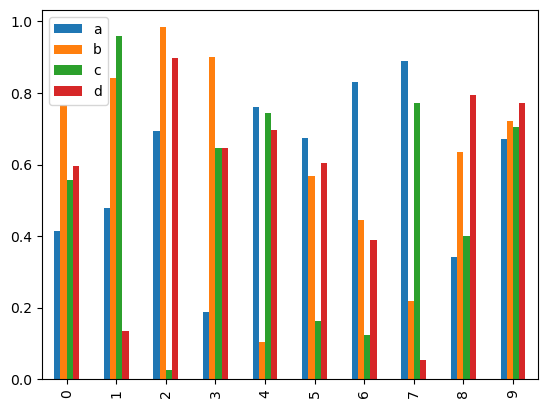

In [28]:
df.plot.bar();
plt.show();

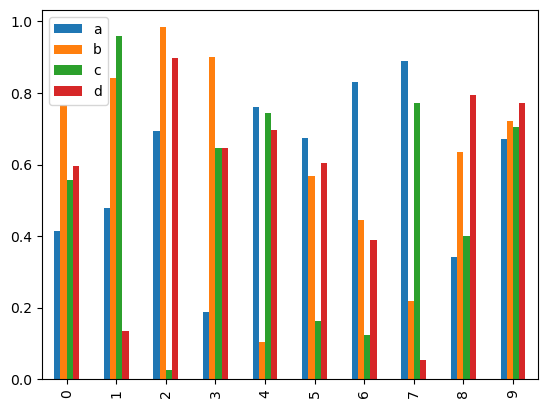

In [29]:
df.plot(kind="bar")
plt.show()

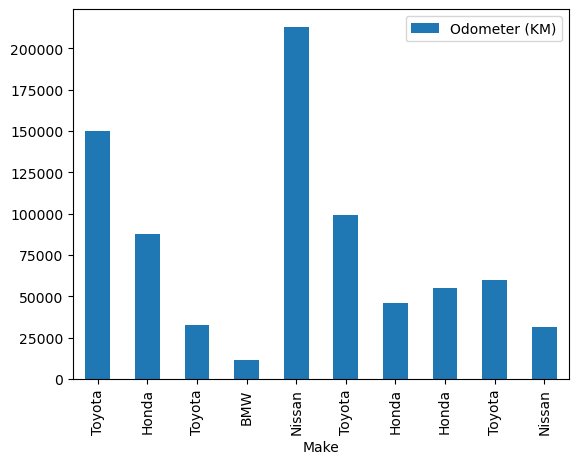

In [30]:
car_sales.plot(x="Make", y="Odometer (KM)",kind="bar");
plt.show();

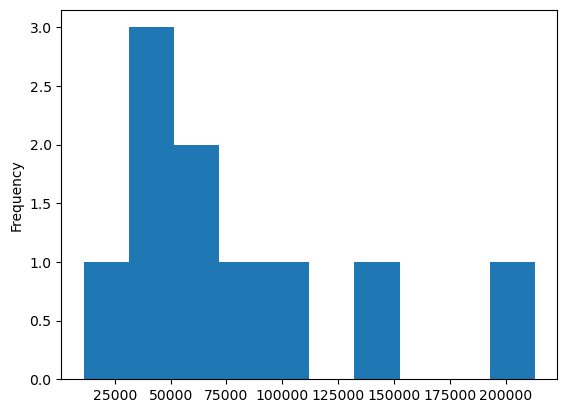

In [31]:
# Histograph - good for visualizing distrubtions--spread of data
car_sales["Odometer (KM)"].plot.hist();
plt.show()

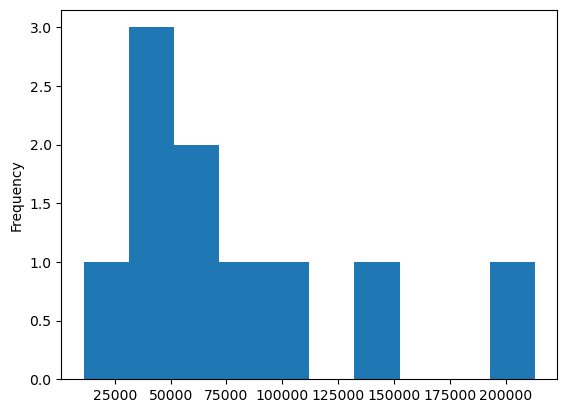

In [32]:
car_sales["Odometer (KM)"].plot(kind="hist");
plt.show()

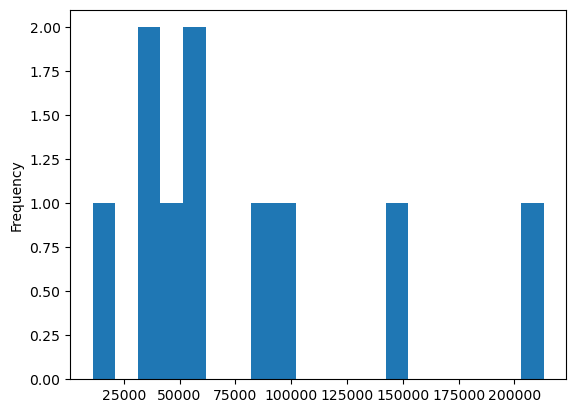

In [33]:
car_sales["Odometer (KM)"].plot.hist(bins=20)
plt.show()

In [34]:
# Try on another data set
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


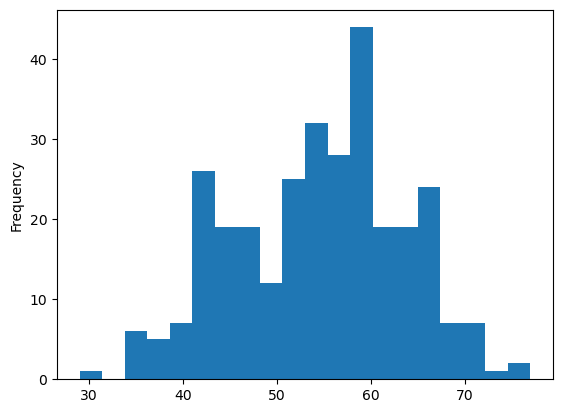

In [35]:
# create histogram of age
heart_disease["age"].plot.hist(bins=20)
plt.show()

In [36]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


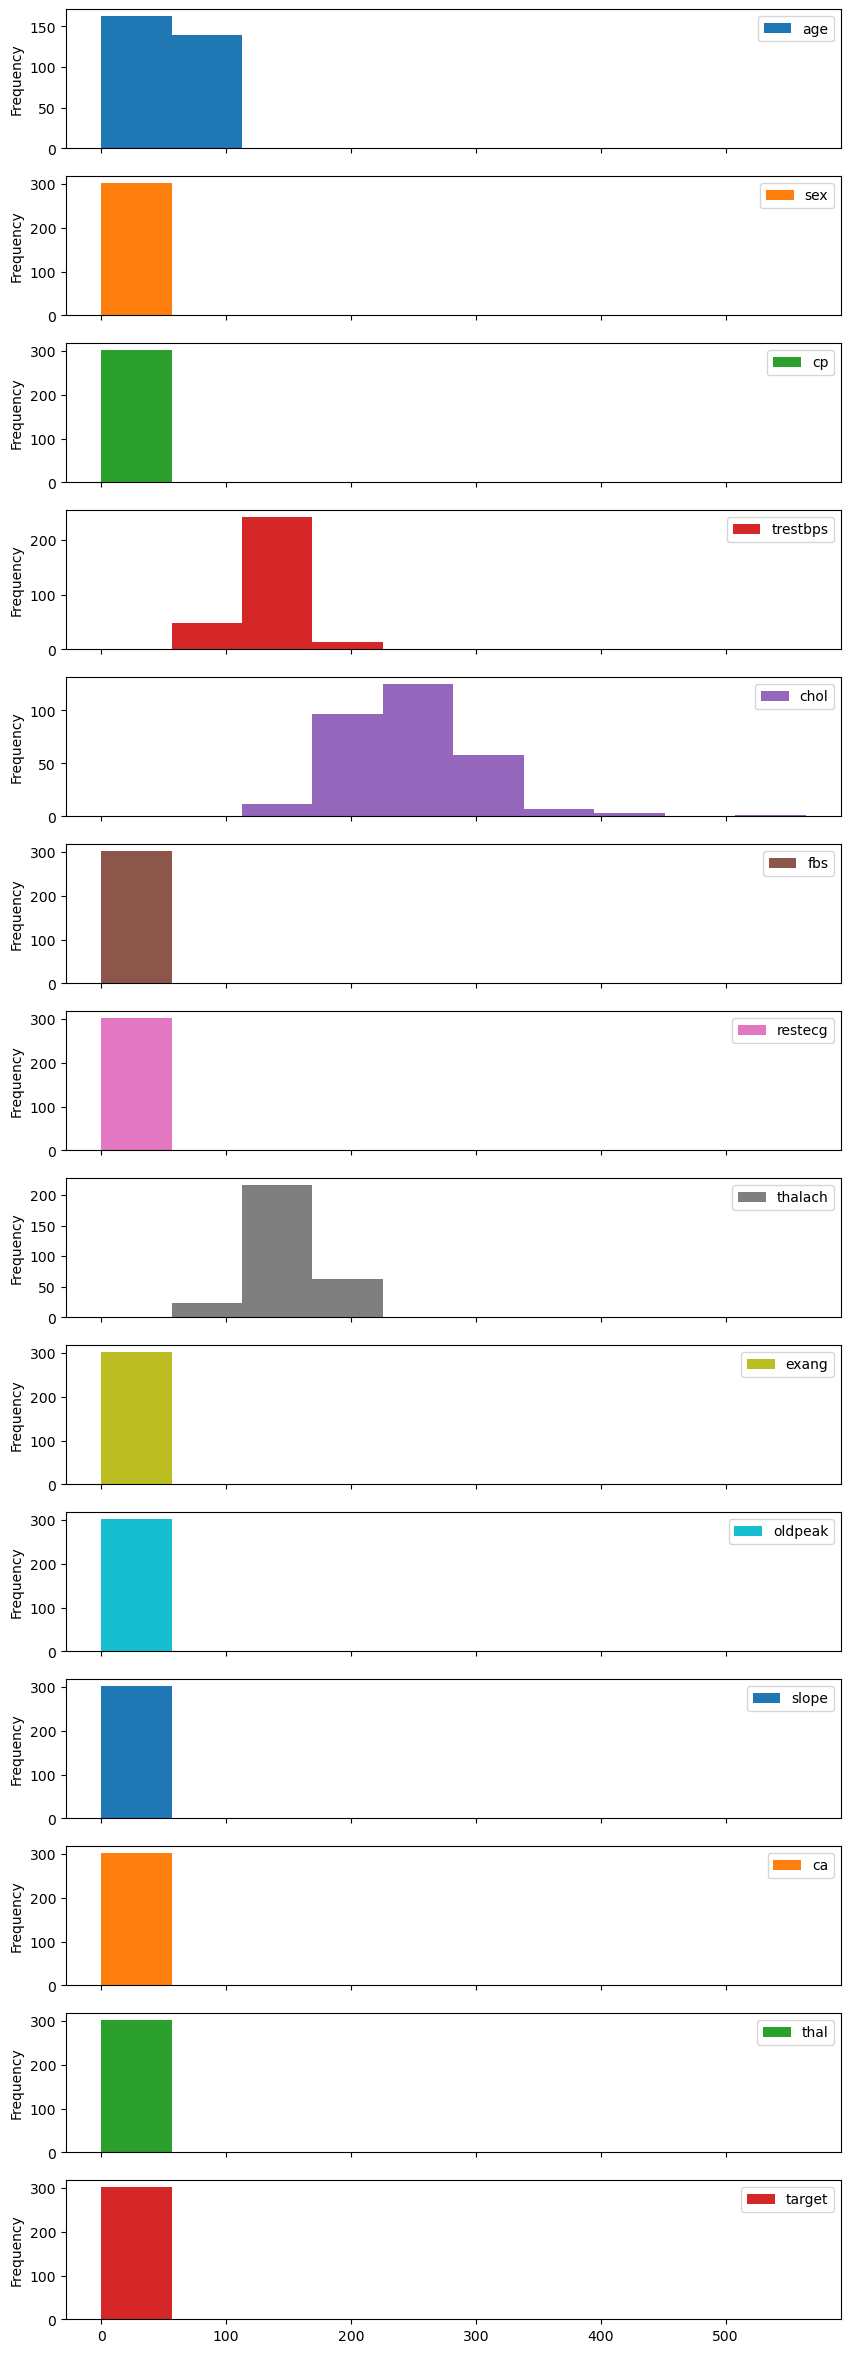

In [37]:
heart_disease.plot.hist(figsize=(10,30),subplots=True);
plt.show()

### Which one should you use? (pyplot vs matplotlib OO method)

* When plotting something quickly, okay to use pyplot method
* When plotting something more advaned use OO method

In [38]:
over_50 = heart_disease[heart_disease["age"]>50]
len(over_50)

208

In [39]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


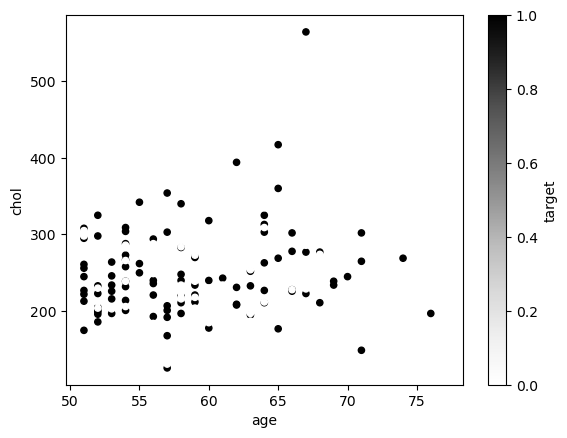

In [40]:
#pyplot method
over_50.plot(kind="scatter", 
             x="age",
             y='chol',
             c='target');
plt.show()

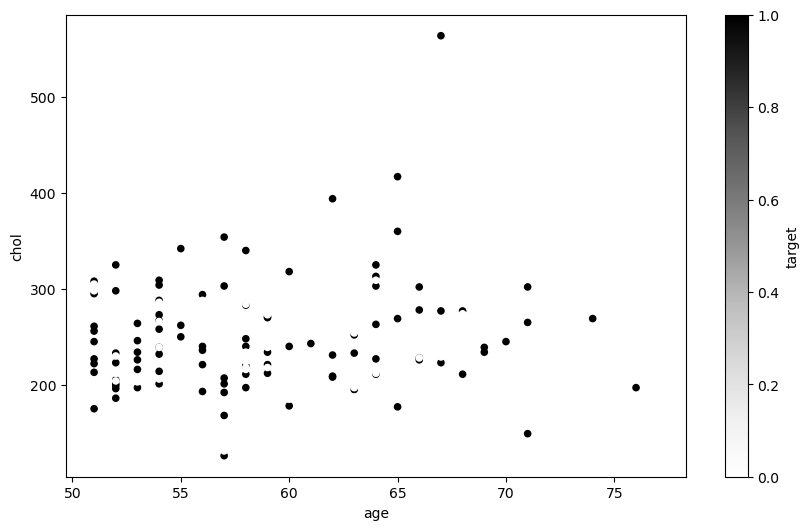

In [41]:
# OO method with pyplot
fix, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax);
#ax.set_xlim([45,100])
plt.show()

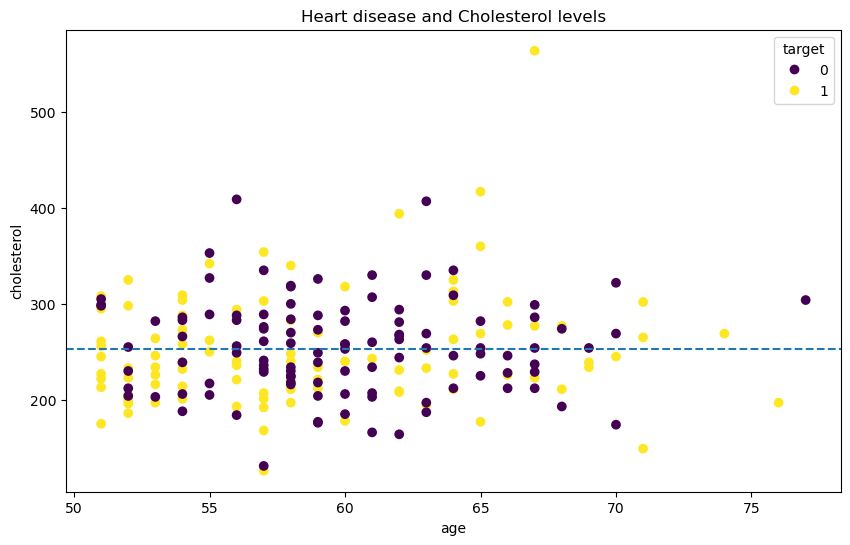

In [42]:
# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

#plot data
scatter=ax.scatter(x=over_50["age"],y=over_50["chol"],c=over_50["target"]);

#Customize
ax.set(title="Heart disease and Cholesterol levels",
       xlabel="age",
       ylabel="cholesterol");
#add legend
ax.legend(*scatter.legend_elements(),title="target");

#add horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle='--');

plt.show()

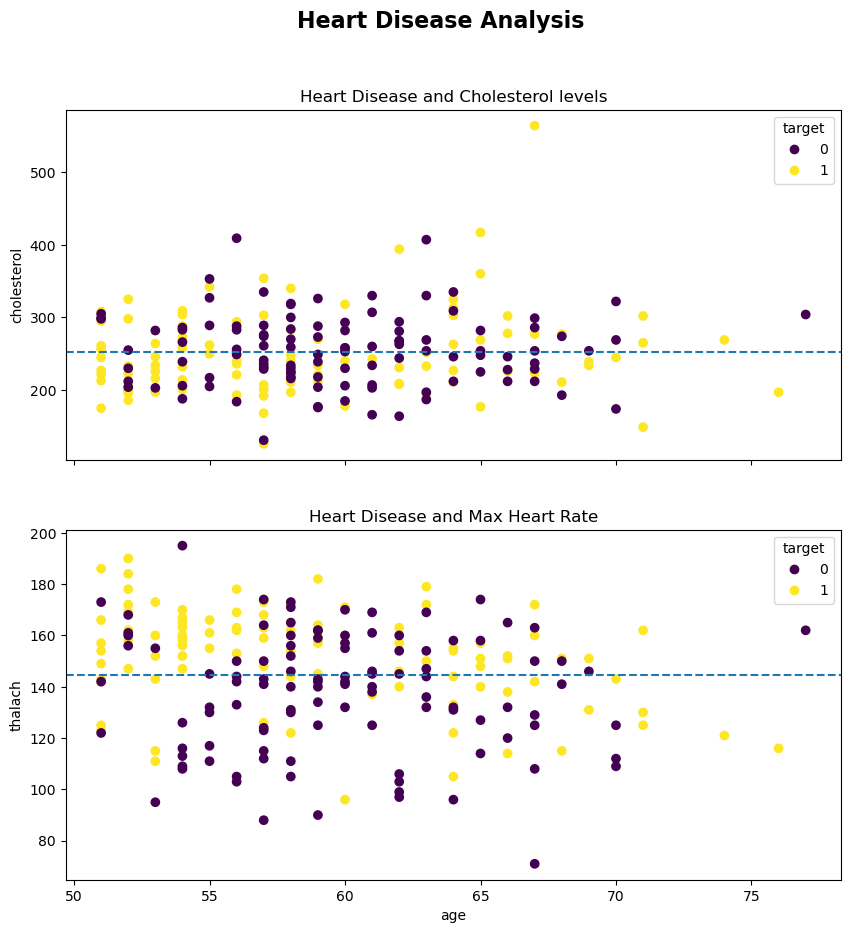

In [48]:
# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10),
                              sharex=True)
#add data to ax0
scatter = ax0.scatter(x=over_50["age"], y=over_50["chol"], c=over_50["target"])
ax0.set(title="Heart Disease and Cholesterol levels",
        ylabel="cholesterol")
ax0.legend(*scatter.legend_elements(),title="target")
ax0.axhline(y=over_50["chol"].mean(),linestyle="--")

#add data to ax1
scatter=ax1.scatter(x=over_50["age"],y=over_50["thalach"],c=over_50["target"])
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="age",
        ylabel="thalach")
ax1.legend(*scatter.legend_elements(),title="target")
ax1.axhline(y=over_50["thalach"].mean(),linestyle="--")

#add title to figure
fig.suptitle("Heart Disease Analysis",fontsize=16,fontweight="bold")

plt.show()

## Customizing matplotlib plots

In [49]:
# see different styles avail
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

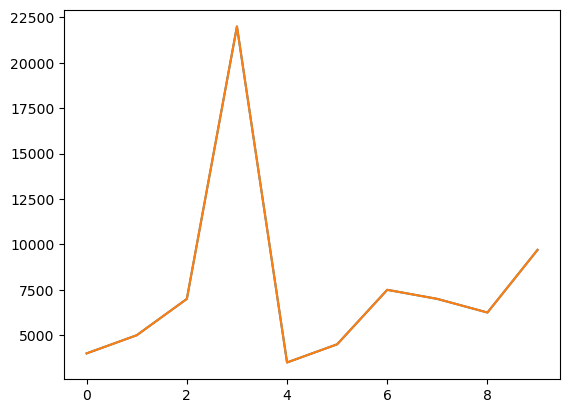

In [51]:
car_sales["Price"].plot();
plt.show()

In [53]:
plt.style.use('seaborn-v0_8-whitegrid')

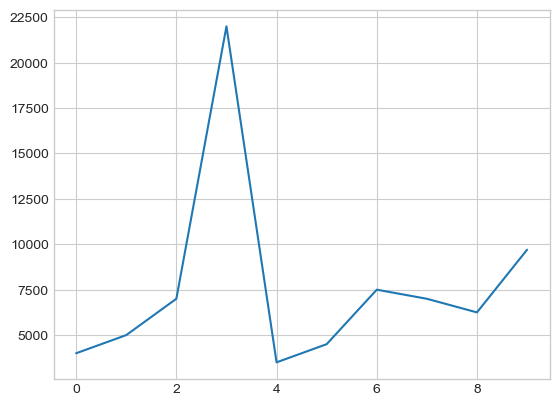

In [54]:
car_sales["Price"].plot();
plt.show()

In [55]:
plt.style.use('seaborn-v0_8')

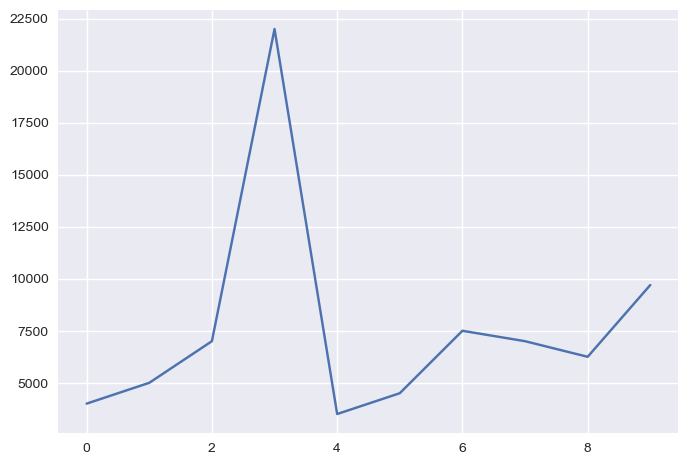

In [56]:
car_sales["Price"].plot();
plt.show()

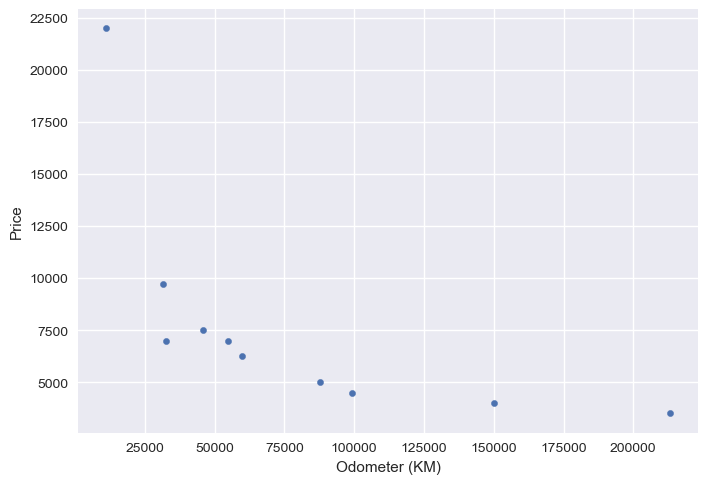

In [59]:
car_sales.plot(x="Odometer (KM)", y="Price",kind="scatter");
plt.show();

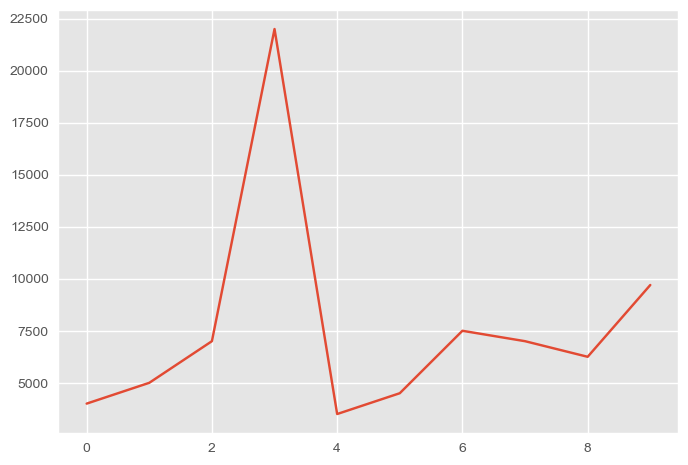

In [60]:
plt.style.use('ggplot')
car_sales["Price"].plot();
plt.show()

In [62]:
# Create some data
x=np.random.randn(10,4)
x

array([[-0.80666428, -0.87389567,  0.48462703, -1.04365623],
       [-1.04379915, -0.12495296, -1.01982122,  0.78896753],
       [ 0.83172692,  1.34980997,  0.15513177, -1.21148983],
       [-0.43943618,  1.10146902, -0.59955677,  1.82645284],
       [-0.68251158, -0.1926943 ,  0.31658858, -0.93834051],
       [ 0.79995646,  0.14992865,  0.91823896,  0.60866823],
       [-0.11761351, -0.59835225,  0.34364817, -2.87048506],
       [-0.18020274,  0.17478187, -0.05836833, -1.1296155 ],
       [-1.88418213,  1.08575912,  0.64504593, -1.32662028],
       [-0.44397164,  0.545441  ,  0.05283407,  0.55904455]])

In [63]:
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,-0.806664,-0.873896,0.484627,-1.043656
1,-1.043799,-0.124953,-1.019821,0.788968
2,0.831727,1.349810,0.155132,-1.211490
3,-0.439436,1.101469,-0.599557,1.826453
4,-0.682512,-0.192694,0.316589,-0.938341
5,0.799956,0.149929,0.918239,0.608668
6,-0.117614,-0.598352,0.343648,-2.870485
7,-0.180203,0.174782,-0.058368,-1.129616
8,-1.884182,1.085759,0.645046,-1.326620
9,-0.443972,0.545441,0.052834,0.559045


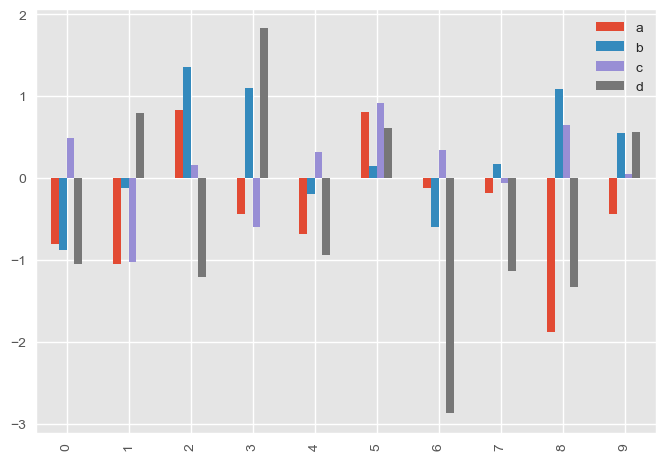

In [66]:
ax = df.plot(kind="bar");
plt.show()

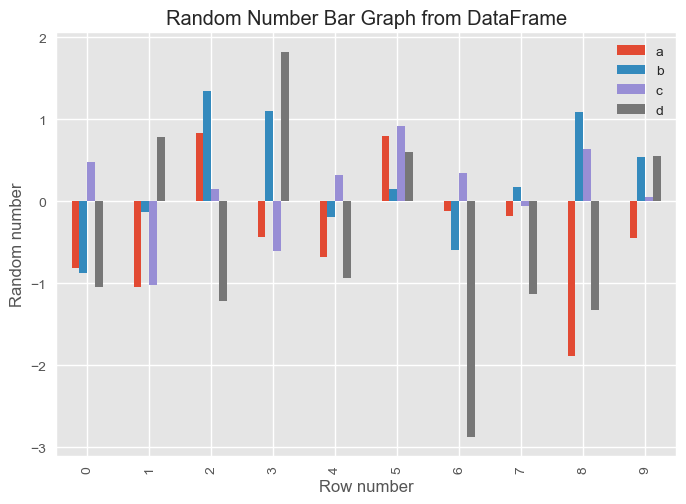

In [69]:
# Customize with set() method
ax = df.plot(kind="bar");
ax.set(title="Random Number Bar Graph from DataFrame",
      xlabel="Row number",
      ylabel="Random number")
ax.legend().set_visible(True)
plt.show()

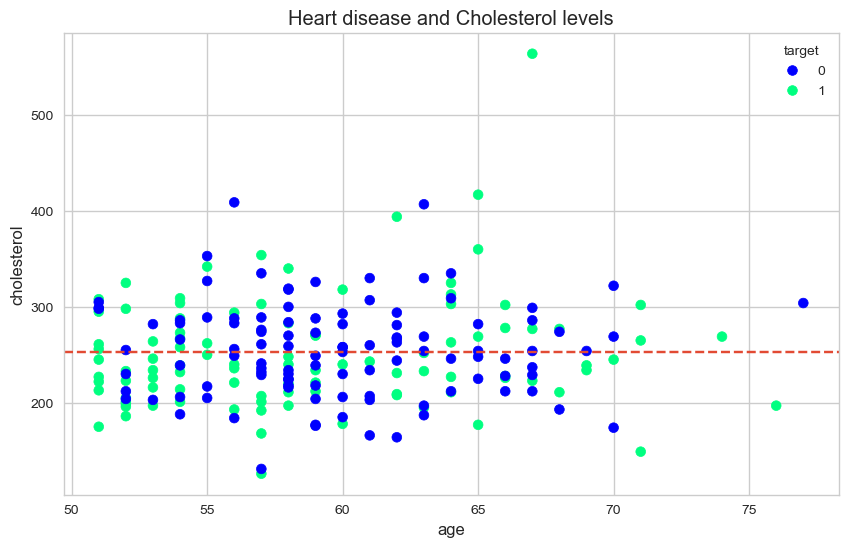

In [72]:
#set style
plt.style.use('seaborn-v0_8-whitegrid')

# OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))

#plot data
scatter=ax.scatter(x=over_50["age"],
                   y=over_50["chol"],
                   c=over_50["target"],
                  cmap="winter");

#Customize
ax.set(title="Heart disease and Cholesterol levels",
       xlabel="age",
       ylabel="cholesterol");
#add legend
ax.legend(*scatter.legend_elements(),title="target");

#add horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle='--');

plt.show()

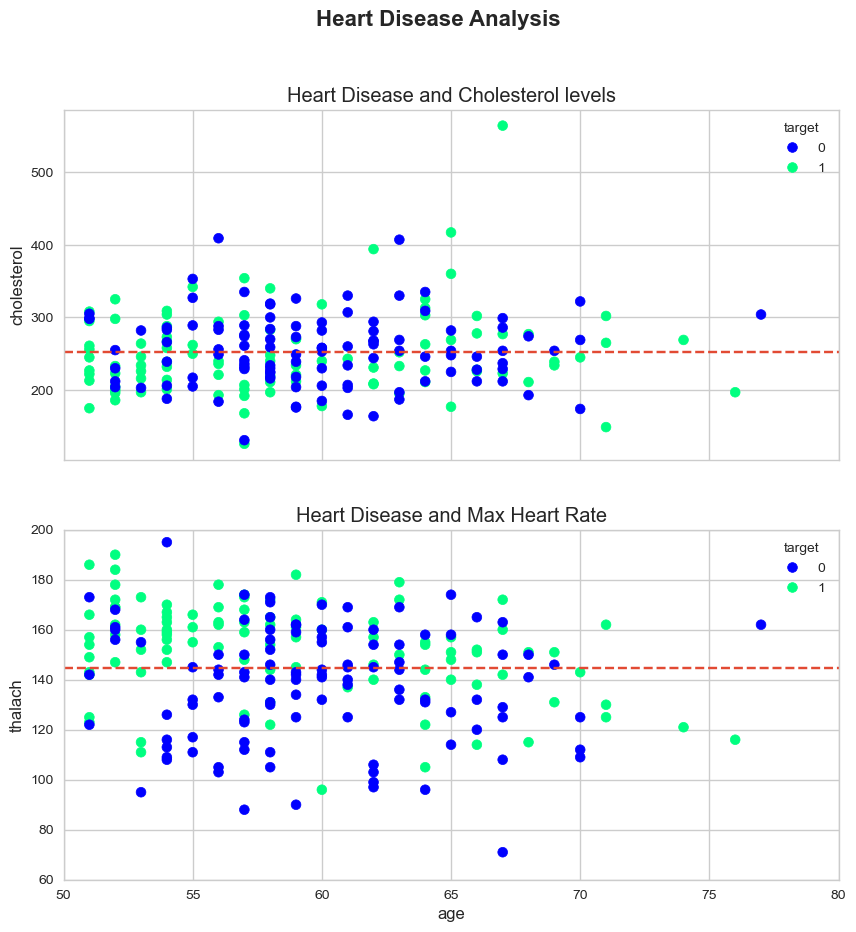

In [78]:
# subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                               ncols=1,
                               figsize=(10,10),
                              sharex=True)
#add data to ax0
scatter = ax0.scatter(x=over_50["age"], 
                      y=over_50["chol"], 
                      c=over_50["target"],
                      cmap="winter")
ax0.set_xlim([50,80])
ax0.set(title="Heart Disease and Cholesterol levels",
        ylabel="cholesterol")
ax0.legend(*scatter.legend_elements(),title="target")
ax0.axhline(y=over_50["chol"].mean(),linestyle="--")

#add data to ax1
scatter=ax1.scatter(x=over_50["age"],
                    y=over_50["thalach"],
                    c=over_50["target"],
                    cmap="winter")
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])
ax1.set(title="Heart Disease and Max Heart Rate",
        xlabel="age",
        ylabel="thalach")
ax1.legend(*scatter.legend_elements(),title="target")
ax1.axhline(y=over_50["thalach"].mean(),linestyle="--")

#add title to figure
fig.suptitle("Heart Disease Analysis",fontsize=16,fontweight="bold")

plt.show()

In [79]:
fig.savefig("heart-diease-analysis-plot.png")